Universidade Federal de Santa Catarina<br>
Departamento de Engenharia Elétrica e Eletrônica<br>
EEL7514/EEL7513 - Introdução ao Aprendizado de Máquina

**Aluno:** Rodrigo Kobashikawa Rosa<br>
**Matrícula:** 14201073
$\newcommand{\bX}{\mathbf{X}}$
$\newcommand{\bw}{\mathbf{w}}$
$\newcommand{\by}{\mathbf{y}}$
$\newcommand{\bx}{\mathbf{x}}$
$\newcommand{\RR}{\mathbb{R}}$


# Exercício 3: Regressão Linear (II)

Neste exercício você irá treinar um modelo de regressão linear, usando tanto a equação normal quanto o método do gradiente, e o usará para fazer predições sobre um conjunto de teste. Além disso, você investigará a adição de novos atributos e a necessidade de regularização.

# Conjunto de dados

O conjunto de dados que usaremos consiste de dados sobre a venda de casas em King County, USA, entre maio de 2014 e maio de 2015. O objetivo é prever o preço de venda a partir de informações sobre a casa. Baixe o arquivo em

http://www.kaggle.com/harlfoxem/housesalesprediction/data

descompacte-o e salve-o numa subpasta `data`, i.e., o arquivo estará acessível em `data/kc_house_data.csv`

Como variável de saída, $y$, utilize o **logaritmo** neperiano do preço de venda, `price`. Desta forma o erro na predição de $y$ será função do erro _relativo_ na predição do preço, evitando dar peso excessivo aos preços mais altos. Como atributos, utilize apenas as 4 colunas após o preço de venda, i.e., `bedrooms`, `bathrooms`, `sqft_living` e `sqft_lot`.

Separe o conjunto de dados aleatoriamente em conjuntos de treinamento e teste, nas proporções 80% e 20%, respectivamente.

Como função perda para o treinamento, utilize o erro quadrático, e, como métrica de avaliação do modelo, utilize a raiz quadrada do erro quadrático médio ([RMSE](https://en.wikipedia.org/wiki/Root-mean-square_error)). **Obs:** ambos são equivalentes, mas o segundo resulta em valores numa escala mais agradável para análise.

<!---
o coeficiente $R^2$ (veja definição em https://en.wikipedia.org/wiki/Coefficient_of_determination). 
-->

### Dicas de implementação

- As seguintes funções podem ser úteis:

```python
pd.DataFrame.as_matrix(), np.astype('float'), np.random.seed(), np.random.permutation(), int(round())
```
- É recomendável utilizar `np.random.seed(0)` (ou qualquer outro valor de _seed_) antes de separar o conjunto de dados, para garantir que seus resultados sejam reprodutíveis.

# Exploração dos dados

Para cada atributo, trace o gráfico da variável de saída em função do atributo, sobre o conjunto de treinamento. Observe as escalas das variáveis envolvidas e analise se há alguma dependência aparente entre as variáveis. Intuitivamente, qual atributo parece ser mais preditivo do preço do venda?

# Organizando o modelo em uma classe do Python

Inicialmente você deve treinar um modelo de regressão linear usando a solução analítica (equação normal) e calcular o RMSE da predição sobre o conjunto de treinamento e sobre o conjunto de teste (semelhante ao exercício anterior)

Porém, para facilitar a implementação de modificações nas questões seguintes, organize suas funções como uma classe do Python:

```python
class Model():
    # Linear regression model
    def __init__(self):
        # Initialization (optional)
        return
    def add_ones(self, X):
        # Add column of ones
        return X_new
    def fit(self, X, y):
        # Add column of ones
        # Fit linear regression
        return
    def predict(self, X):
        # Add column of ones
        # Compute prediction
        return y_hat
    def cost(self, X, y):
        return J
    def rmse(self, X, y):
        # Root-mean-square error (RMSE)
        return E
```

Em particular, você **não** deve adicionar uma coluna de 1's à matriz $\bX$, a qual deve conter somente os atributos originais (4 colunas). A adição do atributo constante deve ser feita pela função `add_ones` e utilizada por outras funções (`fit`, `predict`, etc) sempre que preciso.

Após o treinamento, o vetor de parâmetros do modelo ($w$) deve ser armazenado dentro do objeto usando `self.w`, podendo ser reutilizado por outras funções (`predict`) sempre que preciso. Também será possível acessá-lo externamente pelo comando `model.w`, onde `model` é um objeto da classe `Model`.

Exemplo:

```python
model = Model()
model.fit(X_train, y_train)
print(model.w)
J_train = model.cost(X_train, y_train)
print(J_train)
y_hat = model.predict(X)
```

**Obs:** Caso deseje passar argumentos durante a criação do objeto (ex: `model = Model(arg1, arg2)`), estes devem ser incluídos na função `__init__`, a qual é executada quando o objeto é criado.

### Análise

- Você diria que o modelo treinado sofre de underfitting, overfitting ou nenhum dos dois? Explique.
- Intuitivamente, essa conclusão já era esperada antes mesmo de treinar o modelo? Por quê?

# Método do gradiente

Adicione à classe do modelo uma função de treinamento via método do gradiente:

```python
def fit_gd(self, X, y, alpha=1, num_iter=100):
    # Add column of ones
    # Fit linear regression (gradient descent)
    return J_history
```

Alternativamente, ao invés de adicionar uma nova função, você pode modificar a função `fit` adicionando um novo método de treinamento:
```python
def fit(self, X, y, solver='ne', alpha=1, num_iter=100):
    # Add column of ones
    if solver == 'ne':
        # Fit linear regression (normal equation)
        return
    elif solver == 'gd':
        # Fit linear regression (gradient descent)
        return J_history
    else:
        raise RuntimeError('Unknown solver')
    return
```



Repita o treinamento, escolhendo apropriadamente a taxa de aprendizado (trace gráficos de `J_history`), e observe a dificuldade de conseguir uma boa convergência, em particular, de alcançar o mesmo erro que a equação normal. Explique por que isso ocorre e por que já era esperado.        

# Normalização de atributos

Implemente a normalização (escalonamento) de atributos conforme vista em sala, a qual consiste de:
- Subtração da média do atributo, para que passe a ter média nula
- Divisão pelo desvio padrão do atributo, para que passe a ter variância unitária

Esse tipo de normalização também é chamado em alguns contextos de padronização (_standardization_), no sentido de resultar na mesma média (0) e variância (1) de uma variável aleatória gaussiana padrão (_standard_), em contraste com outros tipos de normalização (por exemplo, reescalonamento para a escala [0,1]).

Para implementar a normalização:
- Adicione à classe do modelo uma função de cálculo dos parâmetros, a qual deve armazenar a média e desvio padrão de cada atributo:

```python
    def fit_scaler(self, X):
        # Compute and store scaler parameters
        return
```

- Adicione à classe do modelo uma função de escalonamento dos atributos, a qual deve usar os parâmetros calculados pela função `fit_scaler`:

```python
    def scale(self, X):
        # Scale features
        return X_new
```

- Modifique a função `fit` para que inicie chamando a função `fit_scaler` e em seguida aplique a função `scale`.
- Modifique a função `predict` para que aplique a função `scale`.




Realize novamente o treinamento e verifique que agora o método do gradiente converge rapidamente para a solução ótima.

### Dicas de implementação

- As seguintes funções podem ser úteis:

```python
np.mean(axis=0), np.std(axis=0)
```

- Revise as propriedades de broadcasting do NumPy, em particular em operações envolvendo matrizes e arrays 1D.
- Para depurar possíveis erros, lembre-se de verificar o `shape` dos arrays envolvidos.

# Adição de atributos

Adicione novos atributos derivados dos originais (não necessariamente polinomiais) de forma a melhorar o desempenho do modelo. Use sua criatividade e intuição para desenvolver bons atributos.

Para implementar a adição de atributos, inclua uma função:

```python
def add_features(self, X):
    # Add new features derived from the original ones
    return X_new
```

e modifique apropriadamente as funções `fit` e `predict`.

# Regularização

Para evitar overfitting, utilize regularização L2, conforme exercício anterior. Implemente-a em ambos os métodos de treinamento.

### Conjunto de validação

Para determinar o valor ótimo do parâmetro de regularização $\lambda$, devemos evitar medir o desempenho no conjunto de teste, pois podemos acabar causando overfitting neste conjunto. É recomendável usar o conjunto de teste somente na avaliação final do modelo. Para isto, podemos separar parte do conjunto de treinamento para utilizar como **conjunto de validação**, usando para treinamento somente as amostras restantes. Este método de validação é conhecido como **hold-out**.

Nesse caso, é recomendável utilizar um conjunto de validação com o mesmo tamanho do conjunto de teste. Dessa forma, o conjunto de treinamento original deve ser divido em 3/4 para treinamento e 1/4 para validação, resultando em conjuntos de treinamento, validação e teste contendo 60%, 20% e 20% das amostras, respectivamente.

- Assim como no exercício anterior, determine o valor ótimo de $\lambda$, porém medindo o desempenho no conjunto de validação. Em seguida, avalie o desempenho do modelo (com $\lambda$ ótimo) no conjunto de teste.

# Usando a biblioteca scikit-learn

Agora, refaça todo o exercício usando a biblioteca [scikit-learn](http://scikit-learn.org)

Em particular, utilize as seguintes funções:

```python
sklearn.model_selection.train_test_split()
sklearn.linear_model.LinearRegression()
sklearn.preprocessing.StandardScaler()
sklearn.pipeline.Pipeline()
sklearn.preprocessing.PolynomialFeatures()
sklearn.linear_model.Ridge()
sklearn.linear_model.RidgeCV()
```

# (OPCIONAL)

- Refaça a análise utilizando mais colunas da tabela original. Você consegue reduzir o erro no conjunto de teste?
- Utilize um outro conjunto de dados com múltiplos atributos. Sugestão: https://archive.ics.uci.edu/ml/datasets/Wine+Quality

---

# Resolução do exercício

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Conjunto de dados

Load do conjunto de dados

In [2]:
df = pd.read_csv('data/kc_house_data.csv')
df.tail()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287
21612,1523300157,20141015T000000,325000.0,2,0.75,1020,1076,2.0,0,0,...,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357


Removendo features que nao serao utilizadas

In [3]:
df = df[['bedrooms','bathrooms','sqft_living','sqft_lot','price']]
df.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,price
0,3,1.00,1180,5650,221900.0
1,3,2.25,2570,7242,538000.0
2,2,1.00,770,10000,180000.0
3,4,3.00,1960,5000,604000.0
4,3,2.00,1680,8080,510000.0


Removendo outliers

In [4]:
df = df[df['bedrooms']<10]
df = df[df['bathrooms']<6]
df = df[df['sqft_living']<7000]
df = df[df['sqft_lot']<600e3]

Transformação de dataframe para matriz

In [5]:
# data = pd.DataFrame.as_matrix(df) -> Method .as_matrix will be removed in a future version. Use .values instead.
data = df.values
data

array([[3.00000e+00, 1.00000e+00, 1.18000e+03, 5.65000e+03, 2.21900e+05],
       [3.00000e+00, 2.25000e+00, 2.57000e+03, 7.24200e+03, 5.38000e+05],
       [2.00000e+00, 1.00000e+00, 7.70000e+02, 1.00000e+04, 1.80000e+05],
       ...,
       [2.00000e+00, 7.50000e-01, 1.02000e+03, 1.35000e+03, 4.02101e+05],
       [3.00000e+00, 2.50000e+00, 1.60000e+03, 2.38800e+03, 4.00000e+05],
       [2.00000e+00, 7.50000e-01, 1.02000e+03, 1.07600e+03, 3.25000e+05]])

Shuffle aleatório do conjunto de dados

In [6]:
# np.random.seed(0)
# np.random.permutation(data)

In [7]:
X = data[:,[0,1,2,3]]
X

array([[3.000e+00, 1.000e+00, 1.180e+03, 5.650e+03],
       [3.000e+00, 2.250e+00, 2.570e+03, 7.242e+03],
       [2.000e+00, 1.000e+00, 7.700e+02, 1.000e+04],
       ...,
       [2.000e+00, 7.500e-01, 1.020e+03, 1.350e+03],
       [3.000e+00, 2.500e+00, 1.600e+03, 2.388e+03],
       [2.000e+00, 7.500e-01, 1.020e+03, 1.076e+03]])

In [8]:
X.shape

(21560, 4)

In [9]:
y = data[:,4]
y

array([221900., 538000., 180000., ..., 402101., 400000., 325000.])

In [10]:
y = np.log(y)
y

array([12.30998211, 13.19561384, 12.10071213, ..., 12.90445858,
       12.89921983, 12.69158046])

In [11]:
y.shape

(21560,)

Separação do conjunto de dados

In [12]:
# size = int(round(X.shape[0]*0.8))
# X_train = X[:size]
# print(X_train.shape)
# X_test = X[size:]
# print(X_test.shape)

# y_train = y[:size]
# print(y_train.shape)
# y_test = y[size:]
# print(y_test.shape)

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(17248, 4)
(4312, 4)
(17248, 1)
(4312, 1)


## Exploração dos dados

gráfico quartos x preço

<function matplotlib.pyplot.show>

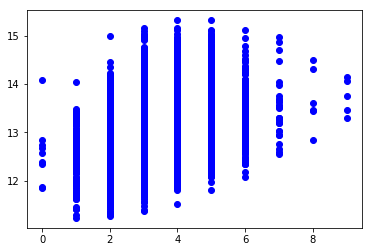

In [14]:
plt.plot(X_train[:,0],y_train,'bo')
plt.show

gráfico banheiro x preço

<function matplotlib.pyplot.show>

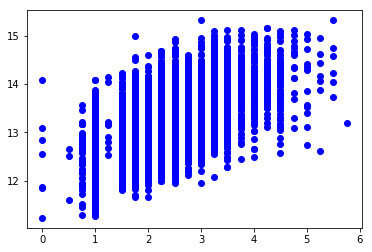

In [15]:
plt.plot(X_train[:,1],y_train,'bo')
plt.show

gráfico área da casa x preço

<function matplotlib.pyplot.show>

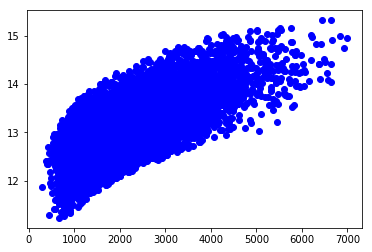

In [16]:
plt.plot(X_train[:,2],y_train,'bo')
plt.show

gráfico área do terreno x preço

<function matplotlib.pyplot.show>

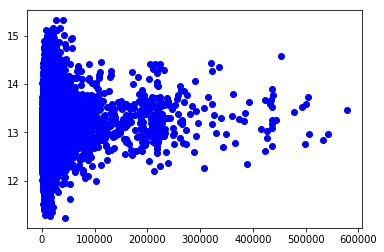

In [17]:
plt.plot(X_train[:,3],y_train,'bo')
plt.show

Observando os gráficos das features do conjunto de treinamento, os gráficos das features 'sqft_living' e 'bathrooms' aparentam ser os mais preditivos em relação ao preço do imóvel. 

Pode-se observar uma relação de aumento de preço de acordo com o aumento do valor da feature e diferente das outras features tem uma menor variação no preço para dado valor.

## Organizando o modelo em uma classe do Python

In [18]:
class Model():
    # Linear regression model
    def __init__(self):
        # Initialization (optional)
        return
    def add_ones(self, X):
        # Add column of ones
        X_new = np.hstack((np.ones_like(X[:,0].reshape(-1,1)), X))
        return X_new
    def fit(self, X, y):
        # Add column of ones
        X = self.add_ones(X)
        # Fit linear regression (normal equation)
        w = np.linalg.inv(X.T @ X) @ (X.T @ y)
        self.w = w
        return
    def predict(self, X):
        # Add column of ones
        X = self.add_ones(X)
        # Compute prediction
        y_hat = X @ self.w
        return y_hat
    def cost(self, X, y):
        J = (1.0/(X.shape[0]))*np.sum(np.power((self.predict(X)-y), 2))
        return J
    def rmse(self, X, y):
        # Root-mean-square error (RMSE)
        E = np.sqrt(self.cost(X,y))
        return E

Treinando o modelo utilizando a equação normal

In [19]:
model = Model()
model.fit(X_train, y_train)
J_train = model.rmse(X_train, y_train)
J_test = model.rmse(X_test, y_test)
y_hat = model.predict(X)

print("w: ", model.w)
print("Custo de treinamento: ",J_train)
print("Custo de teste: ",J_test)

w:  [[ 1.23087723e+01]
 [-7.07232711e-02]
 [ 5.29682973e-02]
 [ 4.19765189e-04]
 [-4.99618651e-07]]
Custo de treinamento:  0.37412803600518374
Custo de teste:  0.37084520630405926


<function matplotlib.pyplot.show>

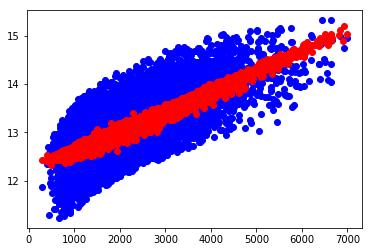

In [20]:
plt.plot(X_train[:,2],y_train,'bo')
plt.plot(X[:,2],y_hat, 'bo',color='red')
plt.show

O modelo treinado conseguiu representar uma relação entre o preço e os atributos, porém pelos gráficos anteriores já haviamos observado que os conjuntos de features não apresentam uma forte correlação com o preço o que torna a predição menos precisa. 

## Método do gradiente

Alterando a função fit para o uso do método do gradiente

In [21]:
class Model():
    # Linear regression model
    def __init__(self):
        # Initialization (optional)
        return
    def add_ones(self, X):
        # Add column of ones
        X_new = np.hstack((np.ones_like(X[:,0].reshape(-1,1)), X))
        return X_new    
    def fit(self, X, y, solver='ne', alpha=1, num_iter=100):
        # Add column of ones
        X = self.add_ones(X)
        if solver == 'ne':
            # Fit linear regression (normal equation)
            w = np.linalg.inv(X.T @ X) @ (X.T @ y)
            self.w = w
            return
        elif solver == 'gd':
            # Fit linear regression (gradient descent)
            # J_history gives a list of values of the cost function for each iteration
            self.w = np.zeros((X.shape[1],1))
            m = X.shape[0]
            J_history = []
            for i in range(num_iter):
                J_new =  np.mean((X @ self.w - y)**2)
                self.w = self.w - alpha*(1/m)* X.T @ (X @ self.w - y) 
                J_history.append(J_new)
            return J_history
        else:
            raise RuntimeError('Unknown solver')
        return
    def predict(self, X):
        # Add column of ones
        X = self.add_ones(X)
        # Compute prediction
        y_hat = X @ self.w
        return y_hat
    def cost(self, X, y):
        J = (1.0/(X.shape[0]))*np.sum(np.power((self.predict(X)-y), 2))
        return J
    def rmse(self, X, y):
        # Root-mean-square error (RMSE)
        E = np.sqrt(self.cost(X,y))
        return E

Treinamento com o método do gradiente

In [22]:
model = Model()
J_hist = model.fit(X_train, y_train, 'gd', 1e-9, 1000)
J_train = model.rmse(X_train, y_train)
J_test = model.rmse(X_test, y_test)
y_hat = model.predict(X)

print("w: ", model.w)
print("Custo de treinamento: ",J_train)
print("Custo de teste: ",J_test)

w:  [[4.04258570e-06]
 [1.18183580e-05]
 [6.61788968e-06]
 [5.30535880e-03]
 [1.92909439e-06]]
Custo de treinamento:  4.802874307493644
Custo de teste:  4.905531011068281


Gráfico Iter x Custo

Text(0,0.5,'Erro')

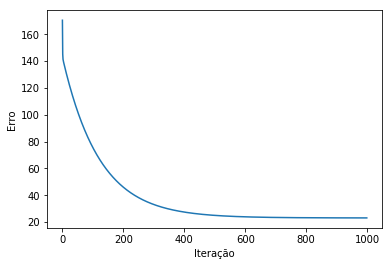

In [23]:
x_axis = np.arange(1000)
plt.plot(x_axis, J_hist)
plt.xlabel('Iteração')
plt.ylabel('Erro')

Observamos que mesmo ajustando os valores de alpha e aumentando o numero de iterações o custo continua sendo muito maior do que o esperado, convergindo para um número próximo a 20. Isso se deve pelo mal condicionamento das features que causa na dificuldade de convergir pelo método do gradiente com um comportamento de zig-zag. Esse comportamento já era esperado ao observar os gráficos e a grande diferência de magnitude entre X e Y. 

## Normalização dos atributos

In [24]:
class Model():
    # Linear regression model
    def __init__(self):
        # Initialization (optional)
        return
    def add_ones(self, X):
        # Add column of ones
        X_new = np.hstack((np.ones_like(X[:,0].reshape(-1,1)), X))
        return X_new

    # Normalização

    def fit_scaler(self, X):
        # Compute and store scaler parameters
        X_mean = np.mean(X,axis=0)
        X_std = np.std(X,axis=0)
        self.X_mean = X_mean
        self.X_std = X_std
        return
    
    def scale(self, X):
        # Scale features
        X_new = (X - self.X_mean)/self.X_std
        return X_new
    
    # método do gradiente
    
    def fit(self, X, y, solver='ne', alpha=1, num_iter=100):
        self.fit_scaler(X)
        X = self.scale(X)
        # Add column of ones
        X = self.add_ones(X)
        if solver == 'ne':
            # Fit linear regression (normal equation)
            w = np.linalg.inv(X.T @ X) @ (X.T @ y)
            self.w = w
            return
        elif solver == 'gd':
            # Fit linear regression (gradient descent)
            # J_history gives a list of values of the cost function for each iteration
            self.w = np.zeros((X.shape[1],1))
            m = X.shape[0]
            J_history = []
            for i in range(num_iter):
                J_new = np.mean((X @ self.w - y)**2)
                self.w = self.w - alpha*(1/m)* X.T @ (X @ self.w - y) 
                J_history.append(J_new)
            return J_history
        else:
            raise RuntimeError('Unknown solver')
        return
  

    def predict(self, X):
        X = self.scale(X)
        # Add column of ones
        X = self.add_ones(X)
        # Compute prediction
        y_hat = X @ self.w
        return y_hat
    def cost(self, X, y):
        J = (1.0/(X.shape[0]))*np.sum(np.power((self.predict(X)-y), 2))
        return J
    def rmse(self, X, y):
        # Root-mean-square error (RMSE)
        E = np.sqrt(self.cost(X,y))
        return E

In [25]:
model = Model()
J_hist = model.fit(X_train, y_train, 'gd',0.5,200)
J_train = model.rmse(X_train, y_train)
J_test = model.rmse(X_test, y_test)
y_hat = model.predict(X)

print("w: ", model.w)
print("Custo de treinamento: ",J_train)
print("Custo de teste: ",J_test)

w:  [[13.04495685]
 [-0.06339468]
 [ 0.03994626]
 [ 0.37091131]
 [-0.01679678]]
Custo de treinamento:  0.37412803600518374
Custo de teste:  0.3708452063040358


Text(0,0.5,'Erro')

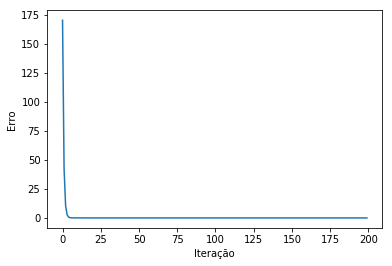

In [26]:
x_axis = np.arange(200)
plt.plot(x_axis, J_hist)
plt.xlabel('Iteração')
plt.ylabel('Erro')

Como de esperado pela observação anterior, com a normalização das features a convergência do método do gradiente se deu muito mais rápido e se aproximou ao valor obtido utilizando a equação normal.

## Adição de atributos

Adicionar novas features atráves de nova função na classe Model()

In [27]:
class Model():
    # Linear regression model
    def __init__(self):
        # Initialization (optional)
        return
    def add_ones(self, X):
        # Add column of ones
        X_new = np.hstack((np.ones_like(X[:,0].reshape(-1,1)), X))
        return X_new
    def gradient(self, w, X, y):
        grad = (1.0/X.shape[0])*(X.T @ ((X @ w) - y))
        return grad
    def fit_scaler(self, X):
        # Compute and store scaler parameters
        X_mean = np.mean(X,axis=0)
        X_std = np.std(X,axis=0)
        self.X_mean = X_mean
        self.X_std = X_std
        return
    def scale(self, X):
        # Scale features
        X_new = (X - self.X_mean)/self.X_std
        return X_new
    
    # Adição de atributos
    
    
    def add_features(self, X):
        # Add new features derived from the original ones
        x1 = X[:,2].reshape(-1,1)
        x2 = X[:,3].reshape(-1,1)
        
        x1_new = np.log10(x1)
        x2_new = np.log(x2)
        
        X_new = np.hstack((X,x1_new,x2_new))
        return X_new
    
    
    
    
    def fit(self, X, y, solver='ne', alpha=1, num_iter=100):
        self.fit_scaler(X)
        X = self.scale(X)
        # Add column of ones
        X = self.add_ones(X)
        if solver == 'ne':
            # Fit linear regression (normal equation)
            w = np.linalg.inv(X.T @ X) @ (X.T @ y)
            self.w = w
            return
        elif solver == 'gd':
            # Fit linear regression (gradient descent)
            # J_history gives a list of values of the cost function for each iteration
            w = np.random.randn(X.shape[1]).reshape(-1,1)
            J_history = np.array([])
            for i in range(num_iter):
                w_new = w - alpha * self.gradient(w, X, y)
                w = w_new
                new_cost = (1.0/(2*X.shape[0]))*np.sum(np.power(((X @ w)-y), 2))
                J_history = np.append(J_history, new_cost)
            self.w = w
            return J_history
        else:
            raise RuntimeError('Unknown solver')
        return
    def predict(self, X):
        X = self.scale(X)
        # Add column of ones
        X = self.add_ones(X)
        # Compute prediction
        y_hat = X @ self.w
        return y_hat
    def cost(self, X, y):
        J = (1.0/(2*X.shape[0]))*np.sum(np.power((self.predict(X)-y), 2))
        return J
    def rmse(self, X, y):
        # Root-mean-square error (RMSE)
        E = np.sqrt(self.cost(X,y))
        return E

In [28]:
model = Model()
X_new = model.add_features(X)
X_new, X_new.shape

(array([[3.00000000e+00, 1.00000000e+00, 1.18000000e+03, 5.65000000e+03,
         3.07188201e+00, 8.63941082e+00],
        [3.00000000e+00, 2.25000000e+00, 2.57000000e+03, 7.24200000e+03,
         3.40993312e+00, 8.88765269e+00],
        [2.00000000e+00, 1.00000000e+00, 7.70000000e+02, 1.00000000e+04,
         2.88649073e+00, 9.21034037e+00],
        ...,
        [2.00000000e+00, 7.50000000e-01, 1.02000000e+03, 1.35000000e+03,
         3.00860017e+00, 7.20785987e+00],
        [3.00000000e+00, 2.50000000e+00, 1.60000000e+03, 2.38800000e+03,
         3.20411998e+00, 7.77821147e+00],
        [2.00000000e+00, 7.50000000e-01, 1.02000000e+03, 1.07600000e+03,
         3.00860017e+00, 6.98100574e+00]]), (21560, 6))

In [29]:
model = Model()
J_hist = model.fit(X_train, y_train)
J_train = model.rmse(X_train, y_train)
J_test = model.rmse(X_test, y_test)
y_hat = model.predict(X)

print("w: ", model.w)
print("Custo de treinamento: ",J_train)
print("Custo de teste: ",J_test)

w:  [[13.04495685]
 [-0.06339468]
 [ 0.03994626]
 [ 0.37091131]
 [-0.01679678]]
Custo de treinamento:  0.26454847129127024
Custo de teste:  0.2622271601481234


Adicionando novas features log x e ln x, devido ao comportamento observado no gráfico, foi possível diminuir o custo de treinamento e teste de 0.37 para 0.26 em ambos os casos.

## Scikit-learn 

Refazer o exercício usando a biblioteca scikit-learn

In [30]:
from sklearn import model_selection, preprocessing
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV
from sklearn.pipeline import Pipeline

In [31]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state=0)

In [32]:
clf = LinearRegression()

In [33]:
clf.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [34]:
clf.coef_

array([-7.07232711e-02,  5.29682973e-02,  4.19765189e-04, -4.99618651e-07])

In [35]:
clf.intercept_

12.308772309997336

In [36]:
accuracy = clf.score(X_test,y_test)
print("Accuracy: ", accuracy)

Accuracy:  0.4887375314552551


### Normalização

In [37]:
scaler = preprocessing.StandardScaler()

In [38]:
X_train_scaled = scaler.fit_transform(X_train)

In [39]:
clf2 = LinearRegression()

In [40]:
clf2.fit(X_train_scaled,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [41]:
clf2.coef_

array([-0.06339468,  0.03994626,  0.37091131, -0.01679678])

In [42]:
clf2.intercept_

13.0449568541302

In [43]:
accuracy = clf2.score(X_test,y_test)
print("Accuracy: ", accuracy)

Accuracy:  -2256605.1752355383


### Ridge

In [44]:
clf3 = Ridge() 

In [45]:
clf3.fit(X_train,y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [46]:
clf3.coef_

array([-7.07140041e-02,  5.29540951e-02,  4.19768703e-04, -4.99617188e-07])

In [47]:
clf3.intercept_

12.308763744167246

In [48]:
accuracy = clf3.score(X_test,y_test)
print("Accuracy: ", accuracy)

Accuracy:  0.4887384038608822


### RidgeCV

In [49]:
clf4 = RidgeCV() 

In [50]:
clf4.fit(X_train,y_train)

RidgeCV(alphas=(0.1, 1.0, 10.0), cv=None, fit_intercept=True, gcv_mode=None,
    normalize=False, scoring=None, store_cv_values=False)

In [51]:
clf4.coef_

array([-7.06307252e-02,  5.28265974e-02,  4.19810449e-04, -4.64380719e-07])

In [52]:
clf4.intercept_

12.308152978310996

In [53]:
clf4.alpha_

10.0

In [54]:
accuracy = clf4.score(X_test,y_test)
print("Accuracy: ", accuracy)

Accuracy:  0.48872380270959226
